<a href="https://colab.research.google.com/github/santiagofigueroaluchetti/APRENDIZAJE_AUTOMATICO_23_24/blob/main/PRACTICA_TERMINADA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Práctica 3*

##*Redes de Neuronas Convolucionales*.

Participantes:
- Santiago Figueroa
- Diego Hermana
- Daniel Vidal

El propósito de la presente práctica es la creación, configuración y entrenamiento de un modelo de Redes Neuronales Convolucionales (CNN, por sus siglas en inglés). Este proceso se llevará a cabo en grupos previamente establecidos, y el resultado final se plasmará en un fichero Jupyter Notebook alojado en Google Colab. Este documento contendrá tanto el código implementado como explicaciones detalladas en formato Markdown embebido.

La tarea principal consiste en desarrollar un modelo de Red de Neuronas Convolucionales capaz de reconocer y clasificar imágenes en 100 categorías. Este modelo se definirá, configurará, entrenará, evaluará y mejorará utilizando el conjunto de datos CIFAR-100, descargado desde https://www.cs.toronto.edu/~kriz/cifar.html. El conjunto CIFAR-100 consta de 100 clases, cada una con 600 imágenes, divididas en 500 imágenes de entrenamiento y 100 imágenes de prueba por clase. Estas clases se agrupan en 20 superclases, y cada imagen está etiquetada tanto con la clase "fina" como con la clase "gruesa".

Las cuestiones clave a abordar en la implementación incluyen la decisión de la estructura de la red neuronal convolucional, la optimización de los hiperparámetros para lograr la mayor precisión en los datos de prueba, y la explicación detallada de la salida generada por el método model.summary() para el modelo final.


Comenzamos con la creación de la red neuronal.

Importación librerias necesarias

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np

Cargar el conjunto de datos CIFAR-100

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

169001437/169001437 [==============================] - 6s 0us/step


Normalizar los valores de píxeles entre 0 y 1


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Convertir las etiquetas a codificación one-hot categórica


In [ ]:
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

Configuración de la red Neuronal

In [ ]:
# Construir el modelo
model = models.Sequential()

# Capa 1: Conv2D + BatchNormalization + MaxPooling + Dropout
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Capa 2: Conv2D + BatchNormalization + MaxPooling + Dropout
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.25))

# Capa 3: Conv2D + BatchNormalization + MaxPooling + Dropout
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.25))

# Capa 4: Conv2D + BatchNormalization + MaxPooling + Dropout
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.25))

# Capa 5: Conv2D + BatchNormalization + MaxPooling + Dropout
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.25))

# Capa 6: Conv2D + BatchNormalization + MaxPooling + Dropout
model.add(layers.Conv2D(1024, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.25))

# Aplanar y conectar a capas totalmente conectadas
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))


Compilar el modelo


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


 Resumen del modelo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 15, 15, 64)        2

# Capas Convolucionales y Operaciones:

**conv2d (Conv2D):** Capa convolucional con 32 filtros de tamaño 3x3. Genera una salida de forma (30, 30, 32) debido a la convolución.

**batch_normalization** (**BatchNormalization**): Capa de normalización que ajusta y normaliza las activaciones de la capa anterior.

**max_pooling2d** (**MaxPooling2D**): Capa de pooling que reduce a la mitad la dimensión espacial de la entrada (15, 15, 32).

**dropout (Dropout):** Capa de dropout que apaga aleatoriamente un porcentaje de unidades para prevenir el sobreajuste.

### Capas Subsiguientes:

El patrón se repite con capas convolucionales, normalización, pooling y dropout. Cada capa convolucional aumenta el número de filtros, reduciendo la dimensión espacial a la mitad.
Capa Flatten (Aplanar):

**flatten (Flatten):** Convierte la salida de las capas convolucionales (1, 1, 1024) en un vector plano de tamaño 1024.
Capas Densas (Totalmente Conectadas):

**dense (Dense):** Capa densa con 512 neuronas y activación ReLU.
batch_normalization_6 (BatchNormalization): Capa de normalización para las activaciones de la capa densa.
dropout_6 (Dropout): Capa de dropout para prevenir el sobreajuste.
dense_1 (Dense): Capa densa final con 100 neuronas y activación softmax, correspondiente a las 100 clases de CIFAR-100.
Resumen de Parámetros:

**Total params:** Muestra el número total de parámetros en el modelo, incluyendo entrenables y no entrenables.

**Trainable params**: Indica el número de parámetros que se ajustarán durante el entrenamiento.

**Non-trainable params:** Representa la cantidad de parámetros que no se modificarán durante el entrenamiento.

En resumen, el modelo consta de capas convolucionales, normalización, pooling y dropout, seguidas por capas densas. La última capa densa tiene 100 neuronas, que es el número de clases en CIFAR-100. La estructura general del modelo busca extraer características a través de capas convolucionales y luego clasificarlas utilizando capas densas.

Utilizamos la función de Callbacks de Keras, como EarlyStopping, para monitorear automáticamente el rendimiento y detener el entrenamiento cuando no se observa mejora.

Ponemos 100 epocas pero no va a llegar a esas 100 epocas ya que  gracias al EarlyStopping va a para cuando la red comience a sobreentrenarse.

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping

# Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con EarlyStopping
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images,test_labels), callbacks=[early_stopping])


Epoch 1/100
1563/1563 [==============================] - 40s 15ms/step - loss: 4.3341 - accuracy: 0.0792 - val_loss: 3.5235 - val_accuracy: 0.1512
Epoch 2/100
1563/1563 [==============================] - 22s 14ms/step - loss: 3.5089 - accuracy: 0.1601 - val_loss: 3.0562 - val_accuracy: 0.2332
Epoch 3/100
1563/1563 [==============================] - 22s 14ms/step - loss: 3.1036 - accuracy: 0.2254 - val_loss: 2.7832 - val_accuracy: 0.2879
Epoch 4/100
1563/1563 [==============================] - 23s 15ms/step - loss: 2.8530 - accuracy: 0.2750 - val_loss: 2.6282 - val_accuracy: 0.3241
Epoch 5/100
1563/1563 [==============================] - 22s 14ms/step - loss: 2.6885 - accuracy: 0.3092 - val_loss: 3.0573 - val_accuracy: 0.2600
Epoch 6/100
1563/1563 [==============================] - 23s 14ms/step - loss: 2.5435 - accuracy: 0.3399 - val_loss: 2.9961 - val_accuracy: 0.2705
Epoch 7/100
1563/1563 [==============================] - 24s 15ms/step - loss: 2.4240 - accuracy: 0.3647 - val_loss: 2

Evaluación en conjunto de testeo

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('La precisión del test es de',test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 1.7671 - accuracy: 0.5369
Test acurracy 0.536899983882904


Ahora vamos a probar con un ejemplo de las test images como nos reconoce.
Podemos selecciona rla imagen que queramos solo tendremos que modificar el numero de las imágenes de test. Si quisiesemos comprobar la imagen 5,
test_image[5]

Hemos creado una herramienta para que una vez nos muestre la imagen nos diga la clase y la superclase que pertenece a dicha imagen.

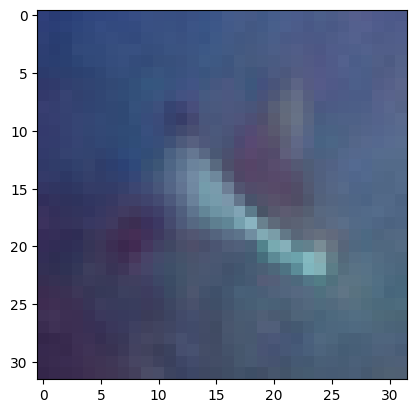

1/1 [==============================] - 0s 365ms/step
30
La clase de la imagen es: delfín
La superclase de la imagen es: mamíferos acuáticos


In [ ]:
import matplotlib.pyplot as plt
# Suponiendo que test_images[89] es una imagen en formato de píxeles (array NumPy)
image_to_visualize = test_images[89]

# Muestra la imagen
plt.imshow(image_to_visualize)
plt.show()
# Probamos con la imagen 89
input_data = np.expand_dims(test_images[89], axis=0)
predictions = model.predict(input_data)
etiqueta_predicha = np.argmax(predictions)
print(etiqueta_predicha)

# Definir un diccionario que mapea números a etiquetas
etiquetas = {
    0: "manzana", 1: "pez_de_acuario", 2: "bebé", 3: "oso", 4: "castor", 5: "cama",
    6: "abeja", 7: "escarabajo", 8: "bicicleta", 9: "botella", 10: "tazón", 11: "niño",
    12: "puente", 13: "autobús", 14: "mariposa", 15: "camello", 16: "lata", 17: "castillo",
    18: "oruga", 19: "ganado", 20: "silla", 21: "chimpancé", 22: "reloj",
    23: "nube", 24: "cucaracha", 25: "sofá", 26: "cangrejo", 27: "cocodrilo",
    28: "taza", 29: "dinosaurio", 30: "delfín", 31: "elefante", 32: "lenguado",
    33: "bosque", 34: "zorro", 35: "niña", 36: "hámster", 37: "casa",
    38: "canguro", 39: "teclado de computadora", 40: "lámpara", 41: "cortacésped",
    42: "leopardo", 43: "león", 44: "lagarto", 45: "langosta", 46: "hombre",
    47: "arce", 48: "motocicleta", 49: "montaña", 50: "ratón",
    51: "seta", 52: "roble", 53: "naranja", 54: "orquídea", 55: "nutria",
    56: "palmera", 57: "pera", 58: "camioneta", 59: "pino",
    60: "llanura", 61: "platos", 62: "amapola", 63: "puercoespín", 64: "zarigüeya",
    65: "conejo", 66: "mapache", 67: "raya", 68: "carretera", 69: "cohete",
    70: "rosa", 71: "mar", 72: "foca", 73: "tiburón", 74: "musaraña",
    75: "mofeta", 76: "rascacielos", 77: "caracol", 78: "serpiente", 79: "araña",
    80: "ardilla", 81: "tranvía", 82: "girasol", 83: "pimiento",
    84: "mesa", 85: "tanque", 86: "teléfono", 87: "televisión", 88: "tigre",
    89: "tractor", 90: "tren", 91: "trucha", 92: "tulipán", 93: "tortuga",
    94: "armario", 95: "ballena", 96: "árbol de sauce", 97: "lobo",
    98: "mujer", 99: "gusano"


}
# Definir la relación entre las clases y las superclases
relacion_clases_superclases = {
"castor": "mamíferos acuáticos",
"delfín": "mamíferos acuáticos",
"nutria": "mamíferos acuáticos",
"foca": "mamíferos acuáticos",
"ballena": "mamíferos acuáticos",
"pez_de_acuario": "peces",
"lenguado": "peces",
"raya": "peces",
"tiburón": "peces",
"trucha": "peces",
"orquídea": "flores",
"amapola": "flores",
"rosa": "flores",
"girasol": "flores",
"tulipán": "flores",
"botella": "recipientes de comida",
"tazón": "recipientes de comida",
"lata": "recipientes de comida",
"taza": "recipientes de comida",
"platos": "recipientes de comida",
"manzana": "frutas y verduras",
"seta": "frutas y verduras",
"naranja": "frutas y verduras",
"pera": "frutas y verduras",
"pimiento": "frutas y verduras",
"reloj": "dispositivos eléctricos para el hogar",
"teclado de computadora": "dispositivos eléctricos para el hogar",
"lámpara": "dispositivos eléctricos para el hogar",
"teléfono": "dispositivos eléctricos para el hogar",
"televisión": "dispositivos eléctricos para el hogar",
"cama": "muebles para el hogar",
"silla": "muebles para el hogar",
"sofá": "muebles para el hogar",
"mesa": "muebles para el hogar",
"armario": "muebles para el hogar",
"abeja": "insectos",
"escarabajo": "insectos",
"mariposa": "insectos",
"oruga": "insectos",
"cucaracha": "insectos",
"oso": "grandes carnívoros",
"leopardo": "grandes carnívoros",
"león": "grandes carnívoros",
"tigre": "grandes carnívoros",
"lobo": "grandes carnívoros",
"puente": "grandes estructuras artificiales al aire libre",
"castillo": "grandes estructuras artificiales al aire libre",
"casa": "grandes estructuras artificiales al aire libre",
"carretera": "grandes estructuras artificiales al aire libre",
"rascacielos": "grandes estructuras artificiales al aire libre",
"nube": "grandes escenas naturales al aire libre",
"bosque": "grandes escenas naturales al aire libre",
"montaña": "grandes escenas naturales al aire libre",
"llanura": "grandes escenas naturales al aire libre",
"mar": "grandes escenas naturales al aire libre",
"camello": "grandes omnívoros y herbívoros",
"ganado": "grandes omnívoros y herbívoros",
"chimpancé": "grandes omnívoros y herbívoros",
"elefante": "grandes omnívoros y herbívoros",
"canguro": "grandes omnívoros y herbívoros",
"zorro": "mamíferos de tamaño mediano",
"puercoespín": "mamíferos de tamaño mediano",
"zarigüeya": "mamíferos de tamaño mediano",
"mapache": "mamíferos de tamaño mediano",
"mofeta": "mamíferos de tamaño mediano",
"cangrejo": "invertebrados no insectos",
"langosta": "invertebrados no insectos",
"caracol": "invertebrados no insectos",
"araña": "invertebrados no insectos",
"gusano": "invertebrados no insectos",
"bebé": "personas",
"niño": "personas",
"niña": "personas",
"hombre": "personas",
"mujer": "personas",
"cocodrilo": "reptiles",
"dinosaurio": "reptiles",
"lagarto": "reptiles",
"serpiente":"reptiles",
 "tortuga": "reptiles",
"hámster": "pequeños mamíferos",
"ratón": "pequeños mamíferos",
"conejo": "pequeños mamíferos",
"musaraña": "pequeños mamíferos",
"ardilla": "pequeños mamíferos",
"arce": "árboles",
"roble": "árboles",
"palmera": "árboles",
"pino": "árboles",
"arbol de sauce": "árboles",
"bicicleta": "vehículos 1",
"autobús": "vehículos 1",
"motocicleta": "vehículos 1",
"camioneta": "vehículos 1",
"tren": "vehículos 1",
"cortacésped": "vehículos 2",
"cohete": "vehículos 2",
"tranvía": "vehículos 2",
"tanque": "vehículos 2",
"tractor": "vehículos 2"
}

# Verificar si el número predicho está en el diccionario
if etiqueta_predicha in etiquetas:
    # Obtener la etiqueta correspondiente al número
    etiqueta_predicha = etiquetas[etiqueta_predicha]
    print("La clase de la imagen es:", etiqueta_predicha)
else:
    print("Número no reconocido")
# Verificar si la clase está en la relación y obtener la superclase
if etiqueta_predicha in relacion_clases_superclases:
    superclase = relacion_clases_superclases[etiqueta_predicha]
    print(f"La superclase de la imagen es: {superclase}")
else:
    print(f"No se encontró información para la clase: {etiqueta_predicha}")


Gráficas que nos muestran de forma mas intuitiva como ha ido el entrenamiento y de que forma ha ido variando la precisión y la pérdida.

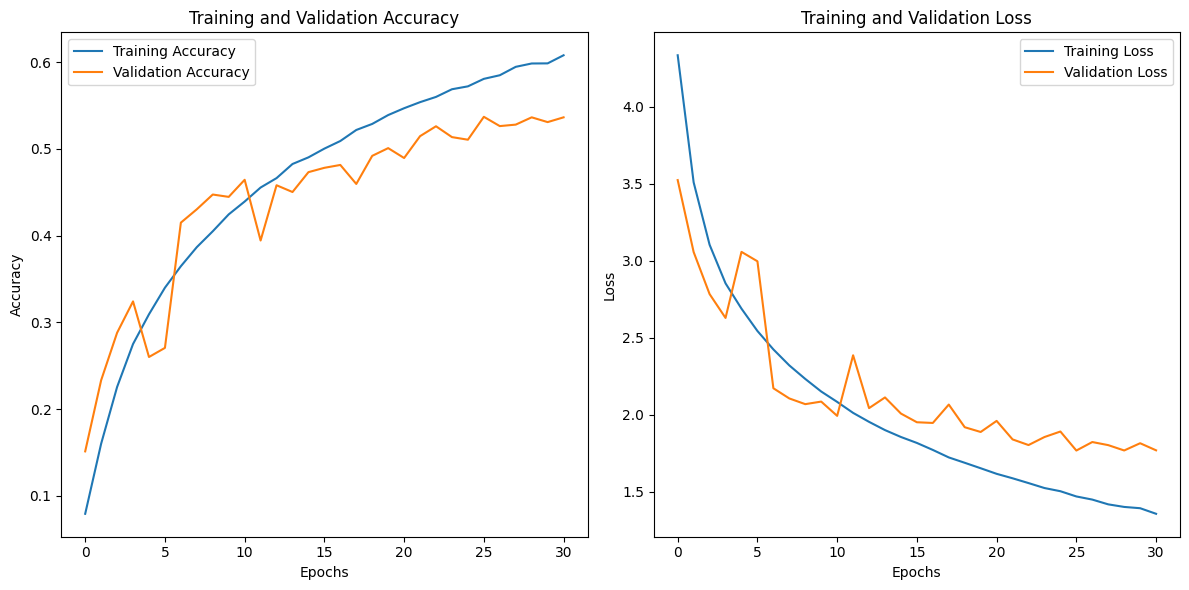

In [ ]:
# Gráfica de precisión (accuracy)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Gráfica de pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


**MEMORIA**

Nos encontramos ante un modelo de red neuronal que se compone de seis capas, que incluyen una capa de entrada, cuatro capas ocultas y una capa de salida con función de activación relu para clasificación.

El modelo se entrenó durante 100 épocas con un tamaño de lote ajustado experimentalmente. Se implementó un mecanismo de parada temprana para prevenir el sobreajuste. La detención del entrenamiento se activó al observar un aumento en la tendencia de sobreajuste, asegurando que el modelo mantenga su capacidad de generalización.

El modelo logró una precisión general del 55%, evaluada sobre un conjunto diverso de clases. Este rendimiento indica la capacidad del modelo para reconocer y clasificar imágenes, aunque se observó que en imagenes específicas se complica la distinción entre ciertas clases, como la diferenciación en alguna imagen de una manzana y con una pera.

Este paso ha sido el más problematico ya que intenar subir la precisión ajustando el número de capas, las funciones de activación, el número de neuronas de cada capa y el número de épocas es algo muy complicado teniendo en cuenta lo que tarda en compilar cada vez. Por esta razón. implementar la función de sobreajuste nos ayudó mucho para conseguir lo que buscabamos.

De la misma manera ha sido un dolor de muelas el crear los arrays con todos los nombres de cada una de las clases y superclases, todos escritos de la manera exacta para que no nos salte ningun error.

**Conclusión:**

El modelo ha demostrado su capacidad para reconocer y clasificar imágenes en un conjunto diverso de clases. Sin embargo, se requiere una evaluación y ajustes continuos para mejorar la precisión y la capacidad del modelo para distinguir entre clases cercanas y complejas. La implementación de estrategias adicionales de optimización y la exploración de técnicas avanzadas son pasos clave para alcanzar un rendimiento óptimo.

En cuanto al trabajo personal del grupo nos ha resultado costoso elevar la precision del entrenamiento, hemos probado ocn muchos metodos, muchas modificaciones de capas y sus derivados y hemos llegado a máximo de precision de 0.55

Tambien conseguimos con facilidad el etiquetar con nombre a el numero asociado a cada imagen con su clase y su superclase.
